# Exercise 1: A function to compute average grades

In this series of exercises, we will use LLMs to generate code based on specific requirements and then compare the output against predefined test cases to ensure correctness. The focus will be on generating functional code and executing tests to verify that it meets the given specifications.

### Step 1: Requirements

The function receives the grades of a student on her courses (for simplicity exactly six grades for six courses are considered) and computes the average. Grades can be from 18 to 30, or 30Laude == 33. The average is computed excluding the best and worse grade.

In [1]:
import pytest
import ipytest

ipytest.autoconfig()


#define here your reference solution
def compute_average(grades):
    """
    Computes the average of grades, excluding the best and worst grades.
    
    Args:
        grades (list): A list of six grades, where each grade is between 18 and 33.
    
    Returns:
        float: The computed average.
    """

    if len(grades) != 6:
        raise ValueError('The number of grades must be exactly six')
    elif any(g < 18 or g > 33 for g in grades):
        raise ValueError('The value of a grade must be between 18 and 33')
    
    grades = sorted(grades)
    grades = grades[1:-1]

    return float(sum(grades))/float(len(grades))


#paste here the result of the function as given by chatGPT
gpt_result = """def compute_average(grades):
    \"""
    Computes the average of grades, excluding the best and worst grades.
    
    Args:
        grades (list): A list of six grades, where each grade is between 18 and 33.
    
    Returns:
        float: The computed average.
    \"""
    if len(grades) != 6:
        raise ValueError("Exactly six grades must be provided.")
    if not all(18 <= grade <= 33 for grade in grades):
        raise ValueError("Grades must be between 18 and 30, or 33 for 30Laude.")
    
    # Sort grades to identify the best and worst
    sorted_grades = sorted(grades)
    
    # Exclude the highest and lowest
    filtered_grades = sorted_grades[1:-1]
    
    # Compute the average of the remaining grades
    return sum(filtered_grades) / len(filtered_grades)
"""


#the dictionary my_codes will contain all the generated codes. Let's start by adding the one generated by chatgpt

my_codes = {}
my_codes["GPT"] = gpt_result.strip()


# Example usage of the function

grades = [18, 25, 30, 33, 22, 28]
average = compute_average(grades)
print(f"The computed average is: {average:.2f}")




The computed average is: 26.25


### Step 2: Test Cases

To generate a comprehensive black-box test suite for the compute_average function, we will create tests that cover different equivalence classes, boundary conditions, and typical scenarios.

- Valid inputs: 
  - Standard valid grades within the range of 18 to 33, including "30Laude" (33).
  - Tests where all grades are different, with some being 30Laude.

- Boundary values:
  - Input with the lowest valid grade (18) and the highest valid grade (33).

- Invalid inputs:
  - A grade list that has more or fewer than 6 grades.
  - Grades outside the valid range (less than 18 or greater than 33).
  - non-numeric inputs

- Edge cases:
  - All grades are the same.
  - All grades are 30Laude (33).


In [2]:
# Valid test cases
import pytest
import ipytest

#an example of a valid test case. Notice the use of the assert function and the pytest.approx to cope with possible roundings

def test_valid_grades():
    grades = [18, 25, 30, 33, 22, 28]
    result = compute_average(grades)
    assert result == pytest.approx(26.25, rel=1e-2)

#an example of an invalid test case. Notice the use of the with pytest.raises syntax, to catch exceptions in the function

# Invalid test cases
def test_more_than_six_grades():
    grades = [18, 25, 30, 33, 22, 28, 29]
    with pytest.raises(ValueError):
        compute_average(grades)

#try to define here additional valid and invalid test cases, that can be used to verify the generated code.
#the ground truth test cases are defined in test_cases_01.py for the average computation function.

#======= VALID TEST CASES ==========
def test_edge_all_same():
    grades = [18]*6
    result = compute_average(grades)
    assert result == pytest.approx(18, rel=1e-2)

def test_edge_all_30laude():
    grades = [33]*6
    result = compute_average(grades)
    assert result == pytest.approx(33, rel=1e-2)

def test_lowest_highest_valid():
    grades = [18, 20, 30, 32, 31, 33]
    result = compute_average(grades)
    assert result == pytest.approx(28.25, rel=1e-2)

def test_valid_more_18_and_more_33():
    grades = [18, 18, 30, 33, 33, 30]
    result = compute_average(grades)
    assert result == pytest.approx(27.75, rel=1e-2)

#======= INVALID TEST CASES ==========
def test_grade_too_low():
    grades = [18, 25, 30, 33, 22, 12, 29]
    with pytest.raises(ValueError):
        compute_average(grades)

def test_grade_too_high():
    grades = [18, 25, 30, 33, 34, 18, 29]
    with pytest.raises(ValueError):
        compute_average(grades)

def test_less_than_six_grades():
    grades = [18, 25, 30, 33, 22]
    with pytest.raises(ValueError):
        compute_average(grades)

def test_string_value():
    grades = ["aa", 25, 30, 33, 22, 28]
    with pytest.raises(ValueError):
        compute_average(grades)

def test_None_value():
    grades = [None, 25, 30, 33, 22, 28]
    with pytest.raises(ValueError):
        compute_average(grades)

def test_Bool_value():
    grades = [18, True, 30, 33, 22, 28]
    with pytest.raises(ValueError):
        compute_average(grades)

def test_mixes_value():
    grades = ["18", 25, 30, 33, 22, 28]
    with pytest.raises(ValueError):
        compute_average(grades)


### Step 3: Run the test cases

This code defines a function run_tests that uses the ipytest library to run test cases within a Jupyter notebook. The ipytest library seeks for test cases in the notebook and launches them. The '-vv' parameter is used to provide a verbose output.

In [3]:
# Run the test suite

import pytest
import ipytest

def run_tests():
    ipytest.run('-vv')  

# Running the tests
run_tests()

#what is the results of the tests?

======================================= test session starts =======================================
platform win32 -- Python 3.12.0, pytest-9.0.1, pluggy-1.6.0 -- c:\Users\Utente\OneDrive - Politecnico di Torino\Universita\Magistrale\Secondo Anno\LLM\LABS\venv\Scripts\python.exe
cachedir: .pytest_cache
rootdir: c:\Users\Utente\OneDrive - Politecnico di Torino\Universita\Magistrale\Secondo Anno\LLM\LABS\LAB9
plugins: anyio-4.11.0
collecting ... collected 13 items

t_16e5628de99a426ca62f717be52771f8.py::test_valid_grades PASSED                              [  7%]
t_16e5628de99a426ca62f717be52771f8.py::test_more_than_six_grades PASSED                      [ 15%]
t_16e5628de99a426ca62f717be52771f8.py::test_edge_all_same PASSED                             [ 23%]
t_16e5628de99a426ca62f717be52771f8.py::test_edge_all_30laude PASSED                          [ 30%]
t_16e5628de99a426ca62f717be52771f8.py::test_lowest_highest_valid PASSED                      [ 38%]
t_16e5628de99a426ca62f717be52771

### Step 4: Generating code with CodeLLAMA

In this step, we leverage CodeLLAMA to automatically generate Python code based on specified requirements.

In this step, we define a prompt for coding by providing the requirements, the arguments, and the expected returns.


In [4]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

torch.cuda.empty_cache()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


# Load the model and tokenizer from Hugging Face
model_name = "codellama/CodeLlama-7b-Instruct-hf"  # Specify the model name
model = AutoModelForCausalLM.from_pretrained(model_name, torch_dtype=torch.float16, device_map="auto")  # Move model to GPU if available
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Define the prompt
prompt = """
You are a powerful AI assistant capable of generating code based on specific requirements. Please write Python code based on the following requirements:

### Requirements:
Write a Python function, named compute_average to compute the average of grades. Six grades are passed as parameters. The average must be performed on four grades, excluding the highest and lowest.
    
Args:
    grades (list): A list of six grades, where each grade is between 18 and 33.
    
Returns:
    float: The computed average.

Examples:
    compute_average([18, 19, 20, 30, 33, 25]) -> 23.5


Function prototype:
    def compute_average(grades):
    
### Code:
"""

# Tokenize the input prompt
inputs = tokenizer(prompt, return_tensors = 'pt').to(device)

# Generate code using the model
outputs = model.generate(
    inputs= inputs['input_ids'], 
    temperature = 0.8, 
    num_return_sequences = 1,
    max_length=300, 
    max_new_tokens=200)

# Decode the output and print the generated code
generated_code = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(generated_code)

c:\Users\Utente\OneDrive - Politecnico di Torino\Universita\Magistrale\Secondo Anno\LLM\LABS\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cuda


`torch_dtype` is deprecated! Use `dtype` instead!
Loading checkpoint shards: 100%|██████████| 2/2 [00:08<00:00,  4.30s/it]
Some parameters are on the meta device because they were offloaded to the cpu.
The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Both `max_new_tokens` (=200) and `max_length`(=300) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingfa


You are a powerful AI assistant capable of generating code based on specific requirements. Please write Python code based on the following requirements:

### Requirements:
Write a Python function, named compute_average to compute the average of grades. Six grades are passed as parameters. The average must be performed on four grades, excluding the highest and lowest.

Args:
    grades (list): A list of six grades, where each grade is between 18 and 33.

Returns:
    float: The computed average.

Examples:
    compute_average([18, 19, 20, 30, 33, 25]) -> 23.5


Function prototype:
    def compute_average(grades):

### Code:
```
def compute_average(grades):
    grades.sort()
    grades = grades[1:-1]
    return sum(grades) / len(grades)
```



### Step 5: Parsing CodeLLAMA results and creating functions

In this step, the focus is on processing the output generated by CodeLLAMA to extract meaningful Python functions that meet the given requirements. The raw output from CodeLLAMA often includes additional context or irrelevant information, so it needs to be parsed and cleaned to isolate the functional code. 

Once the code is extracted, it can be added in our dictionary of source code results.

In [5]:
formatted_code = generated_code.split("### Code:")[1].split("```")[1].strip()

print(formatted_code)

my_codes["CODELLAMA"] = formatted_code



def compute_average(grades):
    grades.sort()
    grades = grades[1:-1]
    return sum(grades) / len(grades)


### Step 6: organizing and analyzing test case results with pytest

The code automates the process of running test cases in a Python file using pytest and parsing the results. It defines a function, parse_test_results, that extracts the counts of errors, failures, and passes from a summary line of the pytest output using regular expressions. The script runs the specified test file (test_cases_01.py) via a subprocess call to pytest, capturing its output in plain text. From the output, it locates the summary line containing test results and uses the parse_test_results function to extract key metrics. It calculates the functional correctness ratio as the fraction of passed tests to the total number of tests executed and prints the counts of passed, failed, and errored tests, along with the computed functional correctness ratio. This process provides a clear and automated way to assess the reliability of the tested code.

In [6]:
import pytest
import subprocess
import re


def parse_test_results(result_string):
    """
    Parses the test result string to extract numbers of errors, failures, and passes.

    Args:
        result_string (str): A string containing test results (e.g., "3 failed, 11 passed in 0.04s").

    Returns:
        dict: A dictionary with keys 'errors', 'failures', and 'passed' and their respective counts.
    """
    # Regular expressions to match the counts for errors, failures, and passes
    #\d --> digit
    #\s --> whitespace
    errors = re.search(r"(\d+)\s+errors?", result_string) # () is a capturing group, meaning that i can later do errors.group(1) to catch the digit
    failures = re.search(r"(\d+)\s+failed", result_string)
    passes = re.search(r"(\d+)\s+passed", result_string)  

    dt_keys = ['errors', 'failures', 'passed']
    dt = {k:0 for k in dt_keys}

    # Extract numbers or default to 0 if not found
    dt['errors'] = int(errors.group(1)) if errors else 0
    dt['failures'] = int(failures.group(1)) if failures else 0
    dt['passed'] = int(passes.group(1)) if passes else 0
    return dt

# Define the path to your test file
test_file = "test_cases_01.py"  


#define code here to write your function generated with GPT in a file "function_01.py". This generated function will be called by the test cases in the file test_cases_01.py

with open("function_01.py", 'w') as f:
    f.write(my_codes["GPT"])


# Run the pytest command and capture the output
result = subprocess.run(
    ["pytest", test_file, "--disable-warnings", "--tb=short", "-q", "--color=no"],
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE,
    text=True
)

# Extract test results from the pytest output
output_lines = result.stdout.split("\n")
summary_line = next((line for line in output_lines if "passed" in line or "failed" in line or "error" in line), None)
result_line = output_lines[-2]

dt = parse_test_results(result_line)
gpt_functional_correctness = dt['passed']/(dt['errors']+dt['failures']+dt['passed'])


# Print the results
print("GPT")
print(f"# Passed: {dt['passed']}")
print(f"# Failed: {dt['failures']}")
print(f"# Errors: {dt['errors']}")
print(f"Functional Correctness Ratio: {gpt_functional_correctness:.2f}")


GPT
# Passed: 11
# Failed: 3
# Errors: 0
Functional Correctness Ratio: 0.79


### Step 7: comparing results

We now extend our analysis to compare the results provided by different agents.

For simplicity, we store the function always on the same file (e.g., function_01.py) and we re-execute the same test file (e.g., test_cases_01.py)

We evaluate the results based on the functional correctness ratio, and we select the best option that was generated.

In [7]:

#define code here to write your function generated with LLAMA in the same file "function_01.py". This generated function will be called by the test cases in the file test_cases_01.py


with open("function_01.py", 'w') as f:
    f.write(my_codes["CODELLAMA"])


result = subprocess.run(
    ["pytest", test_file, "--disable-warnings", "--tb=short", "-q", "--color=no"],
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE,
    text=True
)

# Extract test results from the pytest output
output_lines = result.stdout.split("\n")
summary_line = next((line for line in output_lines if "passed" in line or "failed" in line or "error" in line), None)


result_line = output_lines[-2]


dt = parse_test_results(result_line)
llama_functional_correctness = dt['passed']/(dt['errors']+dt['failures']+dt['passed'])


# Print the results
print("CODELLAMA")
print(f"# Passed: {dt['passed']}")
print(f"# Failed: {dt['failures']}")
print(f"# Errors: {dt['errors']}")
print(f"Functional Correctness Ratio: {llama_functional_correctness:.2f}")



CODELLAMA
# Passed: 6
# Failed: 8
# Errors: 0
Functional Correctness Ratio: 0.43


### Step 8: Analyzing and comparing the quality of the generated code

Static code quality metrics are used to evaluate the structure, readability, and maintainability of code without executing it. Below is a Python program that calculates some common static code quality metrics for a given Python file:

- Lines of Code (LOC): The total number of lines in the file.
- Comment Density: The percentage of lines that are comments.
- Cyclomatic Complexity: A measure of the complexity of a program based on the number of linearly independent paths.
- Maintainability Index (MI): a software metric used to predict how maintainable the code is. It’s often calculated using a combination of Cyclomatic Complexity (CC), Lines of Code (LOC), and Halstead Volume (HV).

The **Radon** tool is a Python package that helps analyze various aspects of code quality, such as Cyclomatic Complexity (CC), Maintainability Index (MI), Raw Metrics (LOC), and Halstead metrics. You can use Radon to analyze the static code quality of your Python code by running it from the command line or through Python code.

The tool can be installed by the following command: pip install radon


In [8]:
def run_tests(test_file):

    result = subprocess.run(
        ["pytest", test_file, "--disable-warnings", "--tb=short", "-q", "--color=no"],
        stdout=subprocess.PIPE,
        stderr=subprocess.PIPE,
        text=True
    )

    # Extract test results from the pytest output
    output_lines = result.stdout.split("\n")
    summary_line = next((line for line in output_lines if "passed" in line or "failed" in line or "error" in line), None)


    result_line = output_lines[-2]


    dt = parse_test_results(result_line)
    functional_correctness = dt['passed']/(dt['errors']+dt['failures']+dt['passed'])

    return functional_correctness

In [ ]:
import radon.complexity as radon_complexity
import radon.metrics as radon_metrics
import radon.raw as radon_raw

def analyze_code_with_radon(file_path):
    """
    Analyzes a Python file and calculates code quality metrics:
    - Cyclomatic Complexity (CC)
    - Maintainability Index (MI)
    - Raw Metrics (LOC, number of functions, etc.)
    
    Args:
        file_path (str): Path to the Python file to analyze.
    """
    with open(file_path, 'r') as file:
        code = file.read()

    # Cyclomatic Complexity Analysis (CC)
    cc_results = radon_complexity.cc_visit(code)
    print("Cyclomatic Complexity:")
    for result in cc_results:
        print(f"Function: {result.name}, Complexity: {result.complexity}")

    # Maintainability Index (MI)
    maintainability_index = radon_metrics.mi_visit(code, multi=False)  # Set multi=False for single file
    print(f"\nMaintainability Index: {maintainability_index}")

    # Raw Metrics (LOC, number of functions, etc.)
    raw_metrics = radon_raw.analyze(code)  # Use analyse method for raw metrics
    print(f"\nLines of Code (LOC): {raw_metrics.loc}")
    print(f"Number of Comments: {raw_metrics.comments}")

    result = {}
    result["CC"] = cc_results[0].complexity
    result["MI"] = maintainability_index
    result["LOC"] = raw_metrics.loc
    result["Comments"] = raw_metrics.comments
    return result


print(my_codes)


overall_results = {}


# cycle over all the pairs language, code in the "my_codes" dictionary. For each code, save the function in the function_01.py file and:
# - execute the radon analysis with the function above
for agent, code in my_codes.items():
    with open("function_01.py", 'w') as f:
        f.write(code)
    
    print(f'\n*********EVALUATING {agent} CODE*********\n')
    result = analyze_code_with_radon("function_01.py")

    functional_correctness = run_tests("test_cases_01.py")

    result['FunctionalCorrectness'] = functional_correctness
    overall_results[agent] = result


#Example of the final structure of the overall_results dictionary
#{'GPT': {'CC': 4, 'MI': 93.26472421003476, 'LOC': 24, 'Comments': 3, 'FunctionalCorrectness': 0.80}, 'CODELLAMA': {'CC': 1, 'MI': 77.16231550361674, 'LOC': 5, 'Comments': 0, 'FunctionalCorrectness': 0.43}}
    

print(overall_results)



{'GPT': 'def compute_average(grades):\n    """\n    Computes the average of grades, excluding the best and worst grades.\n\n    Args:\n        grades (list): A list of six grades, where each grade is between 18 and 33.\n\n    Returns:\n        float: The computed average.\n    """\n    if len(grades) != 6:\n        raise ValueError("Exactly six grades must be provided.")\n    if not all(18 <= grade <= 33 for grade in grades):\n        raise ValueError("Grades must be between 18 and 30, or 33 for 30Laude.")\n\n    # Sort grades to identify the best and worst\n    sorted_grades = sorted(grades)\n\n    # Exclude the highest and lowest\n    filtered_grades = sorted_grades[1:-1]\n\n    # Compute the average of the remaining grades\n    return sum(filtered_grades) / len(filtered_grades)', 'CODELLAMA': 'def compute_average(grades):\n    grades.sort()\n    grades = grades[1:-1]\n    return sum(grades) / len(grades)'}

*********EVALUATING GPT CODE*********

Cyclomatic Complexity:
Function: comp

### Step 9: Plotting the results

generate a set of bar charts to visualize various software metrics for different programming languages, including Cyclomatic Complexity (CC), Maintainability Index (MI), Lines of Code (LOC), and the number of comments. 

start by extracting the relevant data from the overall_results dictionary, which contains these metrics for each language. Then, using Matplotlib, create a 3x2 grid of subplots, each one dedicated to a different metric. 

The first four subplots display the values for CC, MI, LOC, and comments, while the last subplot shows the functional correctness values for two models, GPT and LLaMA. 

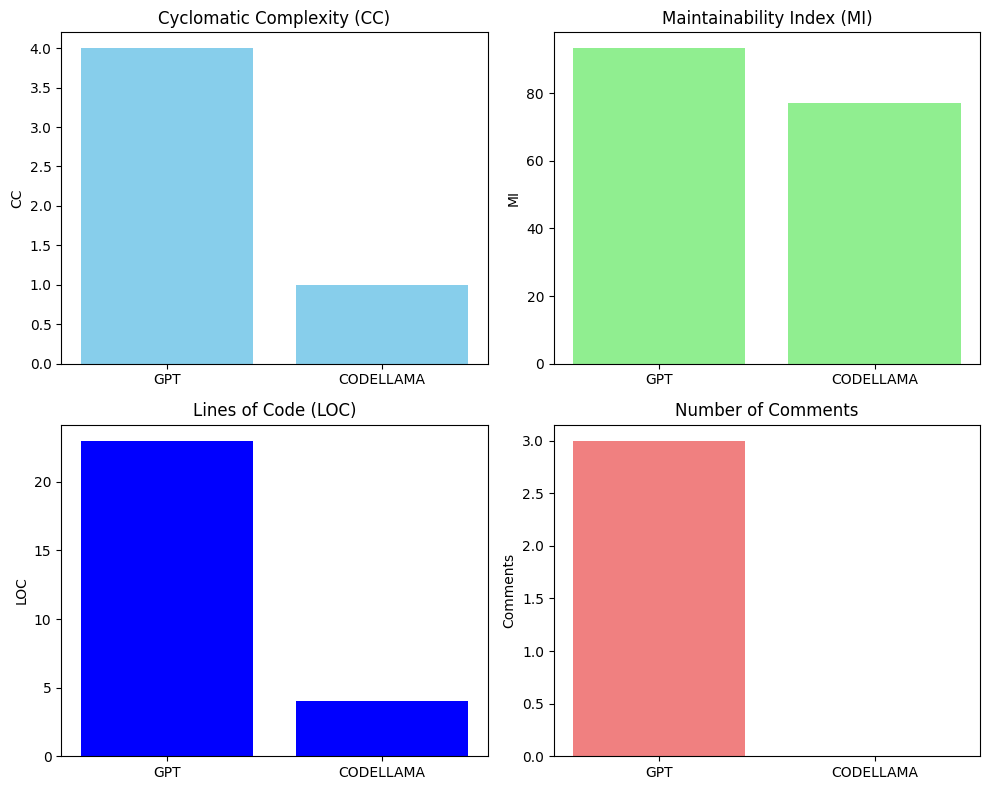

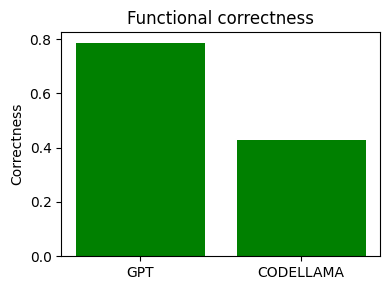

In [10]:

import matplotlib.pyplot as plt
import numpy as np


languages = list(overall_results.keys())  



cc_values = [overall_results[language]['CC'] for language in languages]
mi_values = [overall_results[language]['MI'] for language in languages]
loc_values = [overall_results[language]['LOC'] for language in languages]
comments_values = [overall_results[language]['Comments'] for language in languages]
functional_correctness = [overall_results[language]['FunctionalCorrectness'] for language in languages]

# Create a figure with subplots for each metric
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plotting CC values
axs[0, 0].bar(languages, cc_values, color='skyblue')
axs[0, 0].set_title('Cyclomatic Complexity (CC)')
axs[0, 0].set_ylabel('CC')

# Plotting MI values
axs[0, 1].bar(languages, mi_values, color='lightgreen')
axs[0, 1].set_title('Maintainability Index (MI)')
axs[0, 1].set_ylabel('MI')

# Plotting LOC values
axs[1, 0].bar(languages, loc_values, color='blue')
axs[1, 0].set_title('Lines of Code (LOC)')
axs[1, 0].set_ylabel('LOC')

# Plotting Comments values
axs[1, 1].bar(languages, comments_values, color='lightcoral')
axs[1, 1].set_title('Number of Comments')
axs[1, 1].set_ylabel('Comments')


# Adjust layout and display the plot
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(4, 3))
#plotting functional correctness
ax.bar(languages, functional_correctness, color='green')
ax.set_title('Functional correctness')
ax.set_ylabel('Correctness')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


## Exercise 2: Comparing more LLM agents

After analyzing a chat engine (GPT) and a HuggingFace model (CodeLLAMA) try to generate additional examples of code with other engines.

You can use to this purpose other models provided by HuggingFace, and/or other ready-made chat engines (e.g., Kwen).

In [14]:
qwen_chat = "Qwen/Qwen2.5-Coder-7B-Instruct" 

torch.cuda.empty_cache()

model = AutoModelForCausalLM.from_pretrained(qwen_chat, dtype = torch.float16).to(device)
tokenizer = AutoTokenizer.from_pretrained(qwen_chat)



messages = [
    {'role': 'user',
     'content': """### Requirements:
Write a Python function, named compute_average to compute the average of grades. Six grades are passed as parameters. The average must be performed on four grades, excluding the highest and lowest.
    
Args:
    grades (list): A list of six grades, where each grade is between 18 and 33.
    
Returns:
    float: The computed average.

Examples:
    compute_average([18, 19, 20, 30, 33, 25]) -> 23.5


Function prototype:
    def compute_average(grades):
    
### Code:"""},
    {'role': 'system',
     'content': 'You are a powerful AI assistant capable of generating code based on specific requirements. Please write Python code based on the user requirements.'}
]

# Tokenize the input prompt
inputs = tokenizer.apply_chat_template(
	messages,
	add_generation_prompt=True,
	tokenize=True,
	return_dict=True,
	return_tensors="pt",
).to(model.device)

# Generate code using the model
outputs = model.generate(
    **inputs, 
    temperature = 0.8, 
    num_return_sequences = 1,
    max_length=300, 
    max_new_tokens=200)

# Decode the output and print the generated code
generated_code = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(generated_code)
#add the results to the dictionary of codes

#re-execute the analysis in the previous code boxes by comparing more languages

Loading checkpoint shards: 100%|██████████| 4/4 [00:11<00:00,  2.92s/it]
Both `max_new_tokens` (=200) and `max_length`(=300) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


system
You are Qwen, created by Alibaba Cloud. You are a helpful assistant.
user
### Requirements:
Write a Python function, named compute_average to compute the average of grades. Six grades are passed as parameters. The average must be performed on four grades, excluding the highest and lowest.

Args:
    grades (list): A list of six grades, where each grade is between 18 and 33.

Returns:
    float: The computed average.

Examples:
    compute_average([18, 19, 20, 30, 33, 25]) -> 23.5


Function prototype:
    def compute_average(grades):

### Code:
system
You are a powerful AI assistant capable of generating code based on specific requirements. Please write Python code based on the user requirements.
assistant
Certainly! Below is the Python function `compute_average` that computes the average of grades by excluding the highest and lowest grades from the calculation:

```python
def compute_average(grades):
    if len(grades) != 6 or not all(18 <= grade <= 33 for grade in grades):
   

In [16]:
qwen_code = generated_code.split("```python")[1].split("# Example usage:")[0].strip()
print(qwen_code)

def compute_average(grades):
    if len(grades) != 6 or not all(18 <= grade <= 33 for grade in grades):
        raise ValueError("The input list must contain exactly six grades between 18 and 33.")
    
    # Sort the grades to easily exclude the highest and lowest
    sorted_grades = sorted(grades)
    
    # Calculate the average of the remaining four grades
    average = sum(sorted_grades[1:-1]) / 4
    
    return average


In [21]:
my_codes['QWEN'] = qwen_code

with open("function_01.py", 'w') as f:
        f.write(qwen_code)
    
print(f'\n*********EVALUATING QWEN CODE*********\n')
result = analyze_code_with_radon("function_01.py")

print(f'\n*********QWEN CODE TESTS*********\n')
functional_correctness = run_tests("test_cases_01.py")

result['FunctionalCorrectness'] = functional_correctness
overall_results['QWEN'] = result

print(overall_results)



*********EVALUATING QWEN CODE*********

Cyclomatic Complexity:
Function: compute_average, Complexity: 4

Maintainability Index: 95.16958600410537

Lines of Code (LOC): 11
Number of Comments: 2

*********QWEN CODE TESTS*********

{'GPT': {'CC': 4, 'MI': 93.26472421003476, 'LOC': 23, 'Comments': 3, 'FunctionalCorrectness': 0.7857142857142857}, 'CODELLAMA': {'CC': 1, 'MI': 77.16231550361674, 'LOC': 4, 'Comments': 0, 'FunctionalCorrectness': 0.42857142857142855}, 'QWEN': {'CC': 4, 'MI': 95.16958600410537, 'LOC': 11, 'Comments': 2, 'FunctionalCorrectness': 0.7857142857142857}}


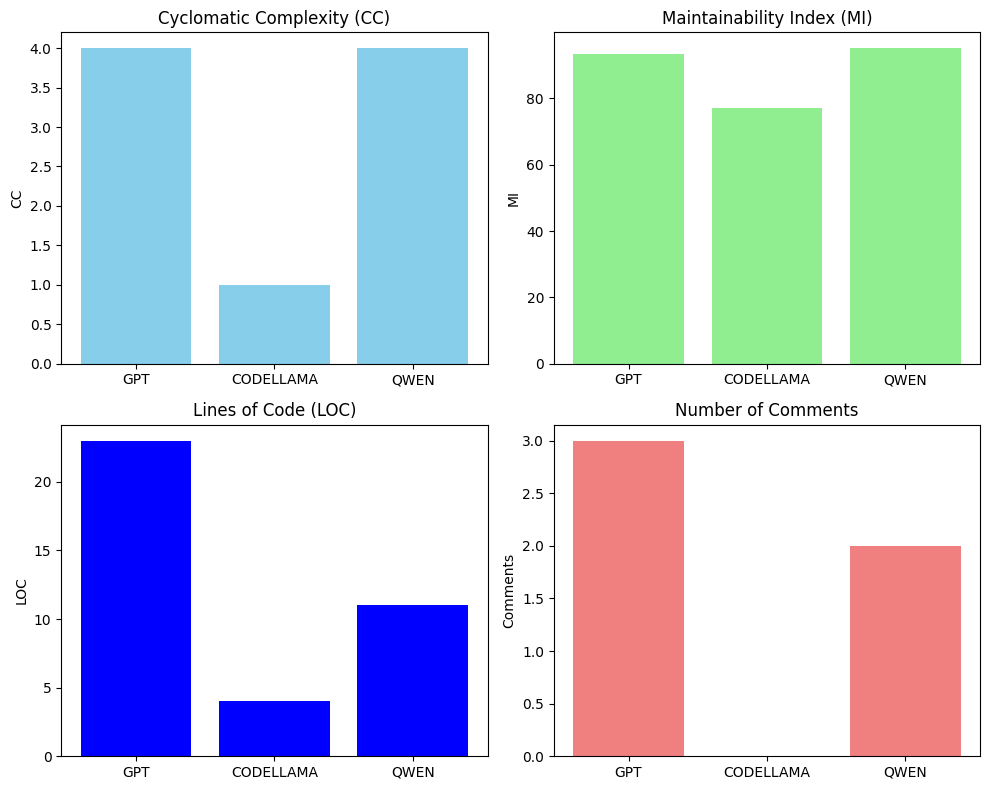

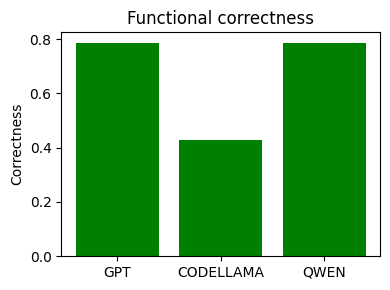

In [22]:

languages = list(overall_results.keys())  



cc_values = [overall_results[language]['CC'] for language in languages]
mi_values = [overall_results[language]['MI'] for language in languages]
loc_values = [overall_results[language]['LOC'] for language in languages]
comments_values = [overall_results[language]['Comments'] for language in languages]
functional_correctness = [overall_results[language]['FunctionalCorrectness'] for language in languages]

# Create a figure with subplots for each metric
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plotting CC values
axs[0, 0].bar(languages, cc_values, color='skyblue')
axs[0, 0].set_title('Cyclomatic Complexity (CC)')
axs[0, 0].set_ylabel('CC')

# Plotting MI values
axs[0, 1].bar(languages, mi_values, color='lightgreen')
axs[0, 1].set_title('Maintainability Index (MI)')
axs[0, 1].set_ylabel('MI')

# Plotting LOC values
axs[1, 0].bar(languages, loc_values, color='blue')
axs[1, 0].set_title('Lines of Code (LOC)')
axs[1, 0].set_ylabel('LOC')

# Plotting Comments values
axs[1, 1].bar(languages, comments_values, color='lightcoral')
axs[1, 1].set_title('Number of Comments')
axs[1, 1].set_ylabel('Comments')


# Adjust layout and display the plot
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(4, 3))
#plotting functional correctness
ax.bar(languages, functional_correctness, color='green')
ax.set_title('Functional correctness')
ax.set_ylabel('Correctness')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


## Exercise 3: Additional functions

To evaluate the generalizability of the LLM code generation, now modify the functions on which you are applying your analysis.

Consider the following requirements:

### Railway company

A railway company offers the possibility to people under 15 to travel free. The offer is dedicated to groups
from 2 to 5 people travelling together.
For being eligible to the offer, at least a member of the group must be at least 18 years old. If this condition
applies, all the under 15 members of the group travel free, and the others pay the Base Price.
The function computeFee receives as parameters basePrice (the price of the ticket), n_passengers (the
number of passengers of the group), n_over18 (the number of passengers at least 18 old), n_under15 (the
number of passengers under 15 years old). It gives as output the amount that the whole group has to spend. It
gives an error if groups are composed of more than 5 persons.
double computeFee(double basePrice, int n_passengers, int n_over18, int n_under15);

- define test cases for this case study in test_cases_02.py
- use a file function_02.py to host the generated results for this function





In [40]:
import gc

model_names = ["codellama/CodeLlama-7b-Instruct-hf","Qwen/Qwen2.5-Coder-7B-Instruct"]

prompt = """
You are a powerful AI assistant capable of generating code based on specific requirements. Please write Python code based on the following requirements:

### Requirements:
A railway company offers the possibility to people under 15 to travel free. The offer is dedicated to groups
from 2 to 5 people travelling together.
For being eligible to the offer, at least a member of the group must be at least 18 years old. If this condition
applies, all the under 15 members of the group travel free, and the others pay the Base Price.
The function computeFee receives as parameters basePrice (the price of the ticket), n_passengers (the
number of passengers of the group), n_over18 (the number of passengers at least 18 old), n_under15 (the
number of passengers under 15 years old). It gives as output the amount that the whole group has to spend. It
gives an error if groups are composed of more than 5 persons.
Args:
    double basePrice: the price of the ticket.
    int n_passengers: the number of passengers of the group.
    int n_over18: the number of passengers at least 18 old.
    int n_under15: the number of passengers under 15 years old
    
Returns:
    float: The amount that the whole group has to spend.

Examples:
    computeFee(double 2, int 4, int 0, int 4) --> 8.0
    computeFee(double 4, int 5, int 1, int 4) --> 4.0


Function prototype:
    def computeFee(double basePrice, int n_passengers, int n_over18, int n_under15):    

    
### Code:
"""

my_codes['GPT'] = """
def computeFee(basePrice, n_passengers, n_over18, n_under15):
    # Basic validation
    if basePrice < 0 or n_passengers < 0 or n_over18 < 0 or n_under15 < 0:
        raise ValueError("Negative values not allowed")

    if n_passengers > 5:
        raise ValueError("Group too large")

    if n_over18 + n_under15 > n_passengers:
        raise ValueError("Inconsistent passenger numbers")

    # Offer requires: group size 2-5 AND at least one >=18
    offer_ok = (2 <= n_passengers <= 5) and (n_over18 >= 1)

    if offer_ok:
        # Under 15 travel free; everyone else pays
        paying = n_passengers - n_under15
        return paying * basePrice
    else:
        # No offer → everyone pays
        return n_passengers * basePrice
"""

for model_name in model_names:
    try:
        del model
        del tokenizer
    except:
        pass
    
    gc.collect()
    torch.cuda.empty_cache()

    model = AutoModelForCausalLM.from_pretrained(model_name, dtype=torch.float16).to(device)
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    if model_name == "Qwen/Qwen2.5-Coder-7B-Instruct":
        messages =[
            {'role': 'system',
             'content': 'You are a powerful AI assistant capable of generating code based on specific requirements. Please write Python code based on the user requirements.'},
             {'role': 'user',
              'content': """
                ### Requirements:
                A railway company offers the possibility to people under 15 to travel free. The offer is dedicated to groups
                from 2 to 5 people travelling together.
                For being eligible to the offer, at least a member of the group must be at least 18 years old. If this condition
                applies, all the under 15 members of the group travel free, and the others pay the Base Price.
                The function computeFee receives as parameters basePrice (the price of the ticket), n_passengers (the
                number of passengers of the group), n_over18 (the number of passengers at least 18 old), n_under15 (the
                number of passengers under 15 years old). It gives as output the amount that the whole group has to spend. It
                gives an error if groups are composed of more than 5 persons.
                Args:
                    double basePrice: the price of the ticket.
                    int n_passengers: the number of passengers of the group.
                    int n_over18: the number of passengers at least 18 old.
                    int n_under15: the number of passengers under 15 years old
                    
                Returns:
                    float: The amount that the whole group has to spend.

                Examples:
                    computeFee(double 2, int 4, int 0, int 4) --> 8.0
                    computeFee(double 4, int 5, int 1, int 4) --> 4.0


                Function prototype:
                    def computeFee(double basePrice, int n_passengers, int n_over18, int n_under15):    

                    
                ### Code:
            """}
        ]

        inputs = tokenizer.apply_chat_template(
            messages,
            add_generation_prompt=True,
            tokenize=True,
            return_dict=True,
            return_tensors="pt",
        ).to(model.device)

        output = model.generate(
            **inputs,
            max_new_tokens=500, 
            temperature = 0.8, 
            num_return_sequences=1
        )
        
        generated_code = tokenizer.decode(output[0], skip_special_tokens=True)

        my_codes['QWEN'] = generated_code
    else:

       # Tokenize the input prompt
        inputs = tokenizer(prompt, return_tensors = 'pt').to(model.device)

        # Generate code using the model
        outputs = model.generate(
            inputs= inputs['input_ids'], 
            temperature = 0.8, 
            num_return_sequences = 1,
            max_new_tokens=500)

        # Decode the output and print the generated code
        generated_code = tokenizer.decode(outputs[0], skip_special_tokens=True)



        my_codes["CODELLAMA"] = generated_code






Loading checkpoint shards: 100%|██████████| 2/2 [00:08<00:00,  4.07s/it]
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Loading checkpoint shards: 100%|██████████| 4/4 [00:08<00:00,  2.23s/it]


In [42]:
for key, val in my_codes.items():
    print(key)
    print(val)

GPT

def computeFee(basePrice, n_passengers, n_over18, n_under15):
    # Basic validation
    if basePrice < 0 or n_passengers < 0 or n_over18 < 0 or n_under15 < 0:
        raise ValueError("Negative values not allowed")

    if n_passengers > 5:
        raise ValueError("Group too large")

    if n_over18 + n_under15 > n_passengers:
        raise ValueError("Inconsistent passenger numbers")

    # Offer requires: group size 2-5 AND at least one >=18
    offer_ok = (2 <= n_passengers <= 5) and (n_over18 >= 1)

    if offer_ok:
        # Under 15 travel free; everyone else pays
        paying = n_passengers - n_under15
        return paying * basePrice
    else:
        # No offer → everyone pays
        return n_passengers * basePrice

CODELLAMA

You are a powerful AI assistant capable of generating code based on specific requirements. Please write Python code based on the following requirements:

### Requirements:
A railway company offers the possibility to people under 15 to travel f

In [53]:
my_codes_copy = my_codes.copy()
for key, val in my_codes_copy.items():
    if key == 'GPT':
        my_codes_copy[key] = val.strip()
    elif key == 'CODELLAMA':
        my_codes_copy[key] = val.split('### Code:')[1].split("```python")[1].split("```")[0].strip()
    elif key == 'QWEN':
        my_codes_copy[key] = val.split("```python")[1].split("```")[0].strip()


In [54]:
for key, val in my_codes_copy.items():
    print(key)
    print(val)

GPT
def computeFee(basePrice, n_passengers, n_over18, n_under15):
    # Basic validation
    if basePrice < 0 or n_passengers < 0 or n_over18 < 0 or n_under15 < 0:
        raise ValueError("Negative values not allowed")

    if n_passengers > 5:
        raise ValueError("Group too large")

    if n_over18 + n_under15 > n_passengers:
        raise ValueError("Inconsistent passenger numbers")

    # Offer requires: group size 2-5 AND at least one >=18
    offer_ok = (2 <= n_passengers <= 5) and (n_over18 >= 1)

    if offer_ok:
        # Under 15 travel free; everyone else pays
        paying = n_passengers - n_under15
        return paying * basePrice
    else:
        # No offer → everyone pays
        return n_passengers * basePrice
CODELLAMA
def computeFee(basePrice, n_passengers, n_over18, n_under15):
    if n_passengers > 5:
        raise ValueError("Groups are composed of more than 5 persons")
    if n_over18 > 0:
        return n_over18 * basePrice
    else:
        return n_unde

In [56]:
my_codes = my_codes_copy

In [63]:
agents = list(my_codes.keys())

overall_results = {}

for agent in agents:
    with open("function_02.py", 'w', encoding='utf-8') as f:
            f.write(my_codes[agent])
        
    print(f'\n*********EVALUATING {agent} CODE*********\n')
    result = analyze_code_with_radon("function_02.py")

    print(f'\n*********{agent} CODE TESTS*********\n')
    functional_correctness = run_tests("test_cases_02.py")

    result['FunctionalCorrectness'] = functional_correctness
    overall_results[agent] = result


print(overall_results)


*********EVALUATING GPT CODE*********

Cyclomatic Complexity:
Function: computeFee, Complexity: 9

Maintainability Index: 84.85943019342119

Lines of Code (LOC): 21
Number of Comments: 4

*********GPT CODE TESTS*********


*********EVALUATING CODELLAMA CODE*********

Cyclomatic Complexity:
Function: computeFee, Complexity: 3

Maintainability Index: 70.26430240077904

Lines of Code (LOC): 7
Number of Comments: 0

*********CODELLAMA CODE TESTS*********


*********EVALUATING QWEN CODE*********

Cyclomatic Complexity:
Function: computeFee, Complexity: 4

Maintainability Index: 94.20542577301921

Lines of Code (LOC): 14
Number of Comments: 3

*********QWEN CODE TESTS*********

{'GPT': {'CC': 9, 'MI': 84.85943019342119, 'LOC': 21, 'Comments': 4, 'FunctionalCorrectness': 1.0}, 'CODELLAMA': {'CC': 3, 'MI': 70.26430240077904, 'LOC': 7, 'Comments': 0, 'FunctionalCorrectness': 0.46153846153846156}, 'QWEN': {'CC': 4, 'MI': 94.20542577301921, 'LOC': 14, 'Comments': 3, 'FunctionalCorrectness': 0.07

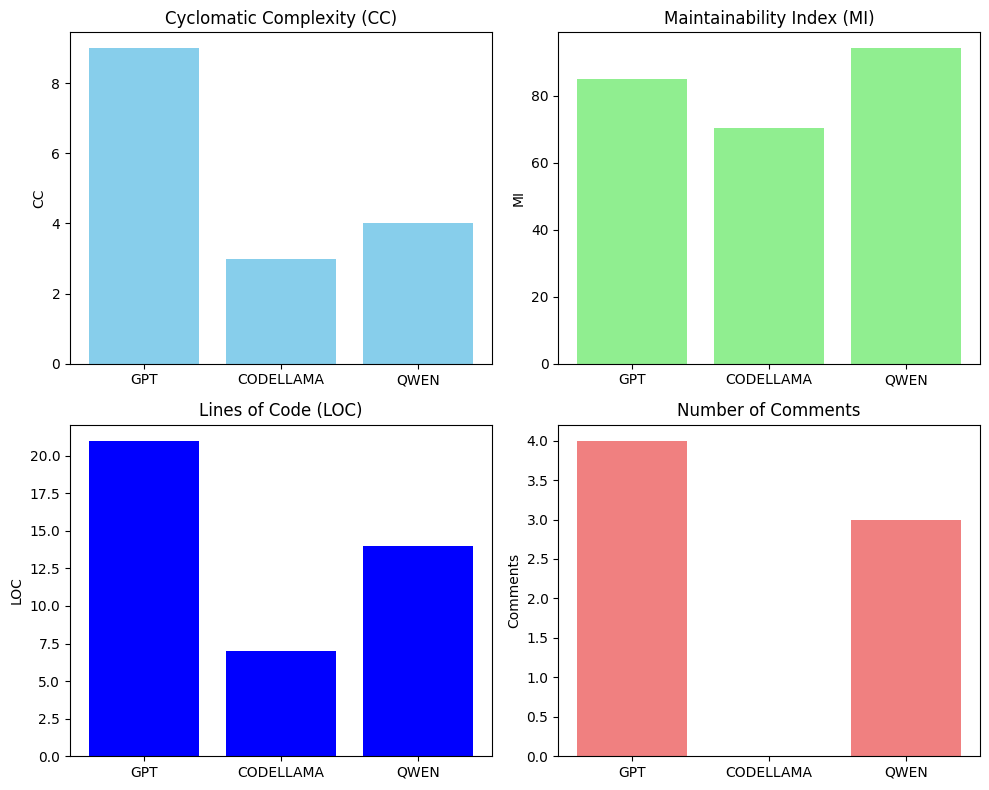

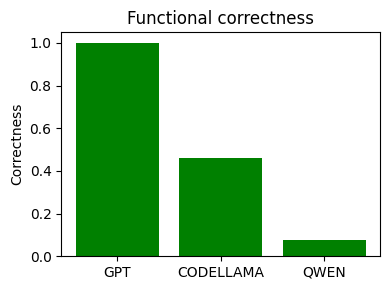

In [64]:

languages = agents 

cc_values = [overall_results[language]['CC'] for language in languages]
mi_values = [overall_results[language]['MI'] for language in languages]
loc_values = [overall_results[language]['LOC'] for language in languages]
comments_values = [overall_results[language]['Comments'] for language in languages]
functional_correctness = [overall_results[language]['FunctionalCorrectness'] for language in languages]

# Create a figure with subplots for each metric
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plotting CC values
axs[0, 0].bar(languages, cc_values, color='skyblue')
axs[0, 0].set_title('Cyclomatic Complexity (CC)')
axs[0, 0].set_ylabel('CC')

# Plotting MI values
axs[0, 1].bar(languages, mi_values, color='lightgreen')
axs[0, 1].set_title('Maintainability Index (MI)')
axs[0, 1].set_ylabel('MI')

# Plotting LOC values
axs[1, 0].bar(languages, loc_values, color='blue')
axs[1, 0].set_title('Lines of Code (LOC)')
axs[1, 0].set_ylabel('LOC')

# Plotting Comments values
axs[1, 1].bar(languages, comments_values, color='lightcoral')
axs[1, 1].set_title('Number of Comments')
axs[1, 1].set_ylabel('Comments')


# Adjust layout and display the plot
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(4, 3))
#plotting functional correctness
ax.bar(languages, functional_correctness, color='green')
ax.set_title('Functional correctness')
ax.set_ylabel('Correctness')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


### Bike Race

In a bike race, the bikers must complete the entire track within a maximum time, otherwise their race is not
valid. The maximum time is computed, for each race, based on the winner's time, on the average speed on the
track, and on the category of the track.
For tracks of category 'A' (easy tracks) the maximum time is computed as the winner's time increased by 5% if
the average speed is lower than 30 km/h (30 included), 10% if the average speed is between 30 and 35 km/h (35
included), and 15% if the average speed is higher than 35 km/h.
For tracks of category 'B' (normal tracks) the maximum time is computed as the winner's time increased by 20%
if the average speed is lower than 30 km/h (30 included), 25% if the average speed is between 30 and 35 km/h
(35 included), and 30% if the average speed is higher than 35 km/h.
For tracks of category 'C' (hard tracks) the maximum time does not depend on average speed, and is always
computed as the winner's time increased by 50%.
The function computeMaxTime receives as parameters winner_time (the time of the winner, in minutes),
avg_speed (the average speed of the track, in km/h) and track_type (a char, whose valid values are 'A', 'B', or
'C'). It gives as output the maximum time, 0 if there are errors in the input.
double computeMaxTime(double winner_time, double avg_speed, char track_type)

- define test cases for this case study in test_cases_03.py
- use a file function_03.py to host the generated results for this function

Re-execute the analysis once you have your test cases and adapted prompts. What changes baed on the complexity of the requirements to implement?

In [65]:
import gc

model_names = ["codellama/CodeLlama-7b-Instruct-hf","Qwen/Qwen2.5-Coder-7B-Instruct"]

prompt = """
You are a powerful AI assistant capable of generating code based on specific requirements. Please write Python code based on the following requirements:

### Requirements:
In a bike race, the bikers must complete the entire track within a maximum time, otherwise their race is not
valid. The maximum time is computed, for each race, based on the winner's time, on the average speed on the
track, and on the category of the track.
For tracks of category 'A' (easy tracks) the maximum time is computed as the winner's time increased by 5% \if
the average speed is lower than 30 km/h (30 included), 10% \if the average speed is between 30 and 35 km/h (35
included), and 15% \if the average speed is higher than 35 km/h.
For tracks of category 'B' (normal tracks) the maximum time is computed as the winner's time increased by 20%
if the average speed is lower than 30 km/h (30 included), 25% \if the average speed is between 30 and 35 km/h
(35 included), and 30% \if the average speed is higher than 35 km/h.
For tracks of category 'C' (hard tracks) the maximum time does not depend on average speed, and is always
computed as the winner's time increased by 50%.
The function computeMaxTime receives as parameters winner_time (the time of the winner, in minutes),
avg_speed (the average speed of the track, in km/h) and track_type (a char, whose valid values are 'A', 'B', or
'C'). It gives as output the maximum time, 0 if there are errors in the input.
 
Args:
    double winner_time: the time of the winner, in minutes.
    double avg_speed: the average speed of the track, in km/h.
    char track_type: a char, whose valid values are 'A', 'B', or 'C'.
    
Returns:
    float: The maximum time, 0 if there are errors in the input.

Examples:
    computeMaxTime(double 10.0, double 4.0, char 'A') --> 10.5
    computeMaxTime(double 10.0, double 5.0, char 'B') --> 12
    computeMaxTime(double 10.0, double 3.0, char 'C') --> 15


Function prototype:
    def computeMaxTime(double winner_time, double avg_speed, char track_type):    

    
### Code:
"""

my_codes['GPT'] = """
def computeMaxTime(winner_time, avg_speed, track_type):
    # -------- Input validation --------
    if winner_time <= 0 or avg_speed <= 0:
        return 0.0

    if track_type not in ('A', 'B', 'C'):
        return 0.0

    # -------- Category C (simple case) --------
    if track_type == 'C':
        return winner_time * 1.5

    # -------- Category A & B (percentage depends on avg_speed) --------
    if track_type == 'A':
        if avg_speed <= 30:
            increase = 0.05
        elif avg_speed <= 35:
            increase = 0.10
        else:
            increase = 0.15

    elif track_type == 'B':
        if avg_speed <= 30:
            increase = 0.20
        elif avg_speed <= 35:
            increase = 0.25
        else:
            increase = 0.30

    # -------- Compute final max time --------
    return winner_time * (1 + increase)
"""

for model_name in model_names:
    try:
        del model
        del tokenizer
    except:
        pass
    
    gc.collect()
    torch.cuda.empty_cache()

    model = AutoModelForCausalLM.from_pretrained(model_name, dtype=torch.float16).to(device)
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    if model_name == "Qwen/Qwen2.5-Coder-7B-Instruct":
        messages =[
            {'role': 'system',
             'content': 'You are a powerful AI assistant capable of generating code based on specific requirements. Please write Python code based on the user requirements.'},
             {'role': 'user',
              'content': """
                ### Requirements:
                In a bike race, the bikers must complete the entire track within a maximum time, otherwise their race is not
                valid. The maximum time is computed, for each race, based on the winner's time, on the average speed on the
                track, and on the category of the track.
                For tracks of category 'A' (easy tracks) the maximum time is computed as the winner's time increased by 5% \if
                the average speed is lower than 30 km/h (30 included), 10% \if the average speed is between 30 and 35 km/h (35
                included), and 15% \if the average speed is higher than 35 km/h.
                For tracks of category 'B' (normal tracks) the maximum time is computed as the winner's time increased by 20%
                if the average speed is lower than 30 km/h (30 included), 25% \if the average speed is between 30 and 35 km/h
                (35 included), and 30% \if the average speed is higher than 35 km/h.
                For tracks of category 'C' (hard tracks) the maximum time does not depend on average speed, and is always
                computed as the winner's time increased by 50%.
                The function computeMaxTime receives as parameters winner_time (the time of the winner, in minutes),
                avg_speed (the average speed of the track, in km/h) and track_type (a char, whose valid values are 'A', 'B', or
                'C'). It gives as output the maximum time, 0 if there are errors in the input.
                
                Args:
                    double winner_time: the time of the winner, in minutes.
                    double avg_speed: the average speed of the track, in km/h.
                    char track_type: a char, whose valid values are 'A', 'B', or 'C'.
                    
                Returns:
                    float: The maximum time, 0 if there are errors in the input.

                Examples:
                    computeMaxTime(double 10.0, double 4.0, char 'A') --> 10.5
                    computeMaxTime(double 10.0, double 5.0, char 'B') --> 12
                    computeMaxTime(double 10.0, double 3.0, char 'C') --> 15


                Function prototype:
                    def computeMaxTime(double winner_time, double avg_speed, char track_type):    

                    
                ### Code:
            """}
        ]

        inputs = tokenizer.apply_chat_template(
            messages,
            add_generation_prompt=True,
            tokenize=True,
            return_dict=True,
            return_tensors="pt",
        ).to(model.device)

        output = model.generate(
            **inputs,
            max_new_tokens=500, 
            temperature = 0.8, 
            num_return_sequences=1
        )
        
        generated_code = tokenizer.decode(output[0], skip_special_tokens=True)

        my_codes['QWEN'] = generated_code
    else:

       # Tokenize the input prompt
        inputs = tokenizer(prompt, return_tensors = 'pt').to(model.device)

        # Generate code using the model
        outputs = model.generate(
            inputs= inputs['input_ids'], 
            temperature = 0.8, 
            num_return_sequences = 1,
            max_new_tokens=500)

        # Decode the output and print the generated code
        generated_code = tokenizer.decode(outputs[0], skip_special_tokens=True)
        my_codes["CODELLAMA"] = generated_code


<>:5: SyntaxWarning: invalid escape sequence '\i'
<>:96: SyntaxWarning: invalid escape sequence '\i'
<>:5: SyntaxWarning: invalid escape sequence '\i'
<>:96: SyntaxWarning: invalid escape sequence '\i'
C:\Users\Utente\AppData\Local\Temp\ipykernel_46428\115736277.py:5: SyntaxWarning: invalid escape sequence '\i'
  prompt = """
C:\Users\Utente\AppData\Local\Temp\ipykernel_46428\115736277.py:96: SyntaxWarning: invalid escape sequence '\i'
  'content': """
Loading checkpoint shards: 100%|██████████| 2/2 [00:08<00:00,  4.19s/it]
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Loading checkpoint shards: 100%|██████████| 4/4 [00:07<00:00,  2.00s/it]


In [66]:
for key, val in my_codes.items():
    print(key)
    print(val)

GPT

def computeMaxTime(winner_time, avg_speed, track_type):
    # -------- Input validation --------
    if winner_time <= 0 or avg_speed <= 0:
        return 0.0

    if track_type not in ('A', 'B', 'C'):
        return 0.0

    # -------- Category C (simple case) --------
    if track_type == 'C':
        return winner_time * 1.5

    # -------- Category A & B (percentage depends on avg_speed) --------
    if track_type == 'A':
        if avg_speed <= 30:
            increase = 0.05
        elif avg_speed <= 35:
            increase = 0.10
        else:
            increase = 0.15

    elif track_type == 'B':
        if avg_speed <= 30:
            increase = 0.20
        elif avg_speed <= 35:
            increase = 0.25
        else:
            increase = 0.30

    # -------- Compute final max time --------
    return winner_time * (1 + increase)

CODELLAMA

You are a powerful AI assistant capable of generating code based on specific requirements. Please write Python code based on

In [69]:
my_codes_copy = my_codes.copy()
for key, val in my_codes_copy.items():
    if key == 'GPT':
        my_codes_copy[key] = val.strip()
    elif key == 'CODELLAMA':
        my_codes_copy[key] = val.split('### Code:')[1].split("```python")[1].split("```")[0].strip()
    elif key == 'QWEN':
        my_codes_copy[key] = val.split("```python")[1].split("# Example usage:")[0].strip()


In [70]:
for key, val in my_codes_copy.items():
    print(key)
    print(val)

GPT
def computeMaxTime(winner_time, avg_speed, track_type):
    # -------- Input validation --------
    if winner_time <= 0 or avg_speed <= 0:
        return 0.0

    if track_type not in ('A', 'B', 'C'):
        return 0.0

    # -------- Category C (simple case) --------
    if track_type == 'C':
        return winner_time * 1.5

    # -------- Category A & B (percentage depends on avg_speed) --------
    if track_type == 'A':
        if avg_speed <= 30:
            increase = 0.05
        elif avg_speed <= 35:
            increase = 0.10
        else:
            increase = 0.15

    elif track_type == 'B':
        if avg_speed <= 30:
            increase = 0.20
        elif avg_speed <= 35:
            increase = 0.25
        else:
            increase = 0.30

    # -------- Compute final max time --------
    return winner_time * (1 + increase)
CODELLAMA
def computeMaxTime(winner_time, avg_speed, track_type):
    if track_type == 'A':
        if avg_speed < 30:
            return

In [71]:
my_codes = my_codes_copy

In [72]:
agents = list(my_codes.keys())

overall_results = {}

for agent in agents:
    with open("function_03.py", 'w', encoding='utf-8') as f:
            f.write(my_codes[agent])
        
    print(f'\n*********EVALUATING {agent} CODE*********\n')
    result = analyze_code_with_radon("function_03.py")

    print(f'\n*********{agent} CODE TESTS*********\n')
    functional_correctness = run_tests("test_cases_03.py")

    result['FunctionalCorrectness'] = functional_correctness
    overall_results[agent] = result


print(overall_results)


*********EVALUATING GPT CODE*********

Cyclomatic Complexity:
Function: computeMaxTime, Complexity: 11

Maintainability Index: 75.92661519817779

Lines of Code (LOC): 31
Number of Comments: 4

*********GPT CODE TESTS*********


*********EVALUATING CODELLAMA CODE*********

Cyclomatic Complexity:
Function: computeMaxTime, Complexity: 10

Maintainability Index: 53.99935992691856

Lines of Code (LOC): 19
Number of Comments: 0

*********CODELLAMA CODE TESTS*********


*********EVALUATING QWEN CODE*********

Cyclomatic Complexity:
Function: computeMaxTime, Complexity: 12

Maintainability Index: 70.67945682293704

Lines of Code (LOC): 28
Number of Comments: 3

*********QWEN CODE TESTS*********

{'GPT': {'CC': 11, 'MI': 75.92661519817779, 'LOC': 31, 'Comments': 4, 'FunctionalCorrectness': 1.0}, 'CODELLAMA': {'CC': 10, 'MI': 53.99935992691856, 'LOC': 19, 'Comments': 0, 'FunctionalCorrectness': 0.6923076923076923}, 'QWEN': {'CC': 12, 'MI': 70.67945682293704, 'LOC': 28, 'Comments': 3, 'Functiona

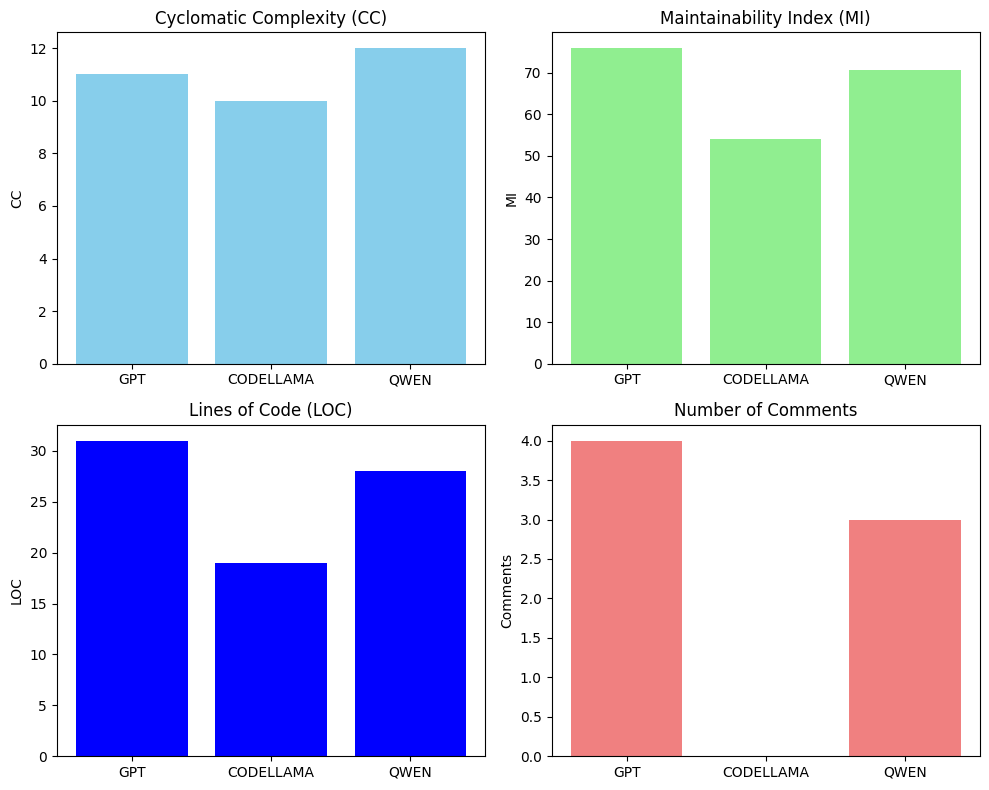

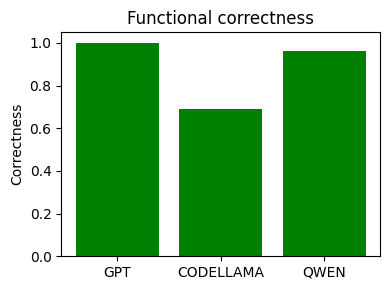

In [73]:

languages = agents 

cc_values = [overall_results[language]['CC'] for language in languages]
mi_values = [overall_results[language]['MI'] for language in languages]
loc_values = [overall_results[language]['LOC'] for language in languages]
comments_values = [overall_results[language]['Comments'] for language in languages]
functional_correctness = [overall_results[language]['FunctionalCorrectness'] for language in languages]

# Create a figure with subplots for each metric
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plotting CC values
axs[0, 0].bar(languages, cc_values, color='skyblue')
axs[0, 0].set_title('Cyclomatic Complexity (CC)')
axs[0, 0].set_ylabel('CC')

# Plotting MI values
axs[0, 1].bar(languages, mi_values, color='lightgreen')
axs[0, 1].set_title('Maintainability Index (MI)')
axs[0, 1].set_ylabel('MI')

# Plotting LOC values
axs[1, 0].bar(languages, loc_values, color='blue')
axs[1, 0].set_title('Lines of Code (LOC)')
axs[1, 0].set_ylabel('LOC')

# Plotting Comments values
axs[1, 1].bar(languages, comments_values, color='lightcoral')
axs[1, 1].set_title('Number of Comments')
axs[1, 1].set_ylabel('Comments')


# Adjust layout and display the plot
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(4, 3))
#plotting functional correctness
ax.bar(languages, functional_correctness, color='green')
ax.set_title('Functional correctness')
ax.set_ylabel('Correctness')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
